<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2022/blob/main/extra_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('f008d1cbd13c.csv',sep=';')
df

,Date & Time,Temperature,Humidity,PM1.0,PM2.5,PM10
0,2021-10-27 17:04:49,18.57,62.40,0.000794,8.024885e-04,2.080711
1,2021-10-27 17:06:07,18.78,62.23,0.000000,6.931414e-310,0.000000
2,2021-10-27 17:10:49,19.06,60.86,1.382680,4.296537e+00,12.044024
3,2021-10-27 17:09:12,18.93,60.90,0.000000,1.792861e-316,0.000000
4,2021-10-28 18:10:12,17.47,69.49,0.757062,2.280473e+00,11.889235
...,...,...,...,...,...,...
5507,2022-02-12 07:10:05,5.15,93.28,1.211290,6.050813e+00,19.139292
5508,2022-02-12 07:39:59,5.44,91.91,1.166558,6.268396e+00,14.782613
5509,2022-02-12 08:09:54,5.59,91.46,1.318408,5.877032e+00,14.396276
5510,2022-02-12 08:39:49,5.66,92.53,1.386052,6.048316e+00,15.956651


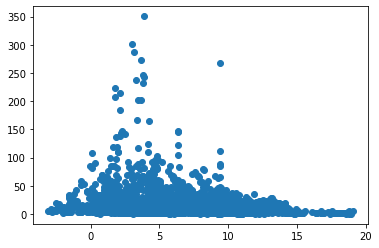

In [3]:
dates = df['Date & Time']
dates = pd.DatetimeIndex(dates)

temperature = df['Temperature'].array
pm2p5 = df['PM2.5']
pm10 = df['PM10']


#scatter temperautre vs PM2.5
plt.scatter(temperature,pm2p5)


In [4]:
# calculating the average
mean_pm2p5 = np.nanmean(pm2p5)
print(mean_pm2p5)
#calculate the std
std_pm2p5 = np.nanstd(pm2p5)
print(std_pm2p5)

14.514419312320125
18.968548073430096


Text(0.5, 1.0, 'freq vs. NO2 concentration')

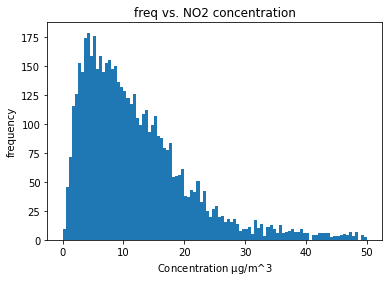

In [5]:
counts, bins, bars = plt.hist(pm2p5,bins=100,range=[0,50]) #here we can set the number of bins and the ranges 
plt.ylabel('frequency')
plt.xlabel('Concentration µg/m^$3$')
plt.title('freq vs. NO2 concentration')

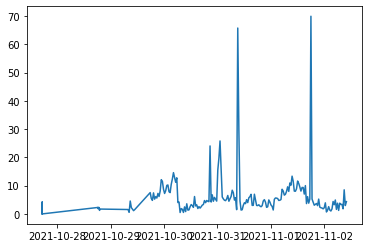

In [6]:
plt.plot(dates[1:200],pm2p5[1:200])

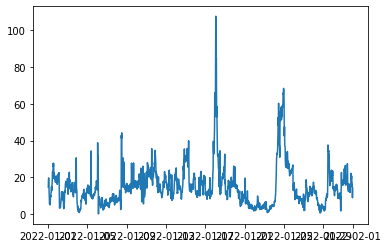

In [7]:
#this will find in the time where all months are January
dates.month==1
#how seperate from data 
jan_pm2p5 = pm2p5[dates.month==1]
jan_dates = dates[dates.month==1]

plt.plot(jan_dates,jan_pm2p5)


22.147149732125175


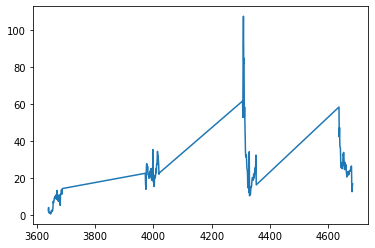

In [8]:
monday_jan_pm2p5 = pm2p5[np.logical_and(dates.month==1,dates.day_of_week==1)]
plt.plot(monday_jan_pm2p5)
ave = np.nanmean(monday_jan_pm2p5)
print(ave)

15.500767902727576
13.719599919907946


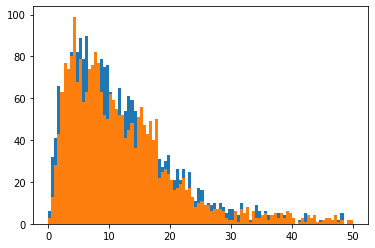

In [9]:
#total average for morning and afternoon 
ave_morn = np.nanmean(pm2p5[dates.hour < 12])
ave_aft = np.nanmean(pm2p5[dates.hour > 12])

print(ave_morn)
print(ave_aft)

counts, bins, bars = plt.hist(pm2p5[dates.hour < 12],bins=100,range=[0,50])
counts, bins, bars = plt.hist(pm2p5[dates.hour > 12],bins=100,range=[0,50])

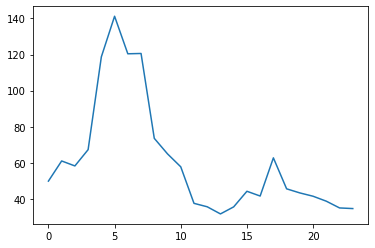

In [10]:
#calculate pollutants through hours of the day 
ave_pm10_hours = np.zeros([24,])
for i in range(0,24):
  ave_pm10_hours[i] = np.nanmean(pm10[dates.hour == i])
plt.plot(ave_pm10_hours)  

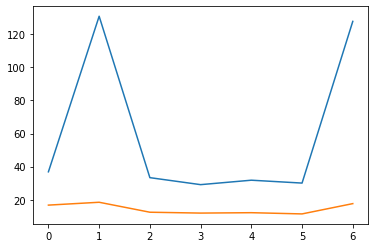

In [11]:
#calculate levels at days of the week
ave_pm10_days = np.zeros([7,])
ave_pm2p5_days = np.zeros([7,])

for i in range(0,7):
  ave_pm10_days[i] = np.nanmean(pm10[dates.day_of_week==i])    
  ave_pm2p5_days[i] = np.nanmean(pm2p5[dates.day_of_week==i])

plt.plot(ave_pm10_days)
plt.plot(ave_pm2p5_days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Int64Index([300, 300, 300, 300, 301, 301, 301, 301, 301, 301,
            ...
             43,  43,  43,  43,  43,  43,  43,  43,  43,  43],
           dtype='int64', name='Date & Time', length=5512)


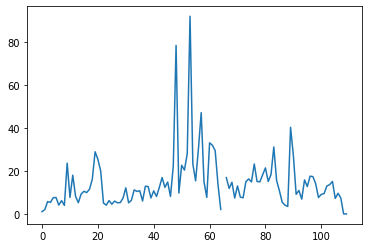

In [19]:
#finding average daily since installed
tmp = dates.day_of_year

daily = np.zeros([110,])
c = 0 
for i in range(tmp[0],365):
  daily[c] = np.nanmean(pm2p5[dates.day_of_year==i])
  c=c+1;
for i in range(0,43):
  daily[c] = np.nanmean(pm2p5[dates.day_of_year==i])
  c=c+1

plt.plot(daily)

print(tmp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


Int64Index([300, 300, 300, 300, 301, 301, 301, 301, 301, 301,
            ...
             43,  43,  43,  43,  43,  43,  43,  43,  43,  43],
           dtype='int64', name='Date & Time', length=5512)


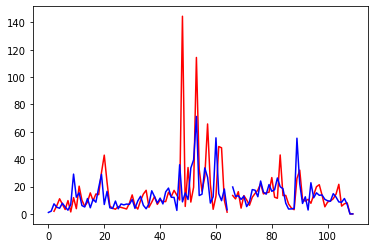

In [25]:
#finding average daily since installed
tmp = dates.day_of_year

daily_morn = np.zeros([110,])
daily_aft = np.zeros([110,])

c = 0 
for i in range(tmp[0],365):
  daily_morn[c] = np.nanmean(pm2p5[np.logical_and(dates.day_of_year==i,dates.hour<12)])
  daily_aft[c] = np.nanmean(pm2p5[np.logical_and(dates.day_of_year==i,dates.hour>12)])
  c=c+1;
for i in range(0,43):
  daily_morn[c] = np.nanmean(pm2p5[np.logical_and(dates.day_of_year==i,dates.hour<12)])
  daily_aft[c] = np.nanmean(pm2p5[np.logical_and(dates.day_of_year==i,dates.hour>12)])
  c=c+1

plt.plot(daily_morn,'r')
plt.plot(daily_aft,'b')

print(tmp)

In [42]:
#read in some defra data 
df = pd.read_csv('LVP (10).csv',sep=';')
dates = df['Date & Time']
dates = pd.DatetimeIndex(dates)
pm2p5 = df['PM2.5']


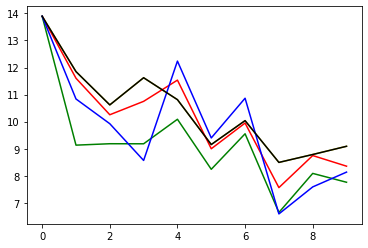

In [52]:
#calculating the changes over the seasons and the years

yearly = np.zeros([10,])

yearly_spring = np.zeros([10,])
yearly_summer = np.zeros([10,])
yearly_autumn = np.zeros([10,])
yearly_winter = np.zeros([10,])

c = 0
#spring is from april 
#summer is from jun - aug 
#autumn is from sept - november 
#winter is from dec - april  


for i in range(2010,2020):
  yearly[c] = np.nanmean(pm2p5[dates.year==i])
  yearly_spring[c] = np.nanmean(pm2p5[np.logical_and(dates.year==i,dates.month>=3, dates.month<6)])
  yearly_summer[c] = np.nanmean(pm2p5[np.logical_and(dates.year==i,dates.month>=6, dates.month<9)])
  yearly_autumn[c] = np.nanmean(pm2p5[np.logical_and(dates.year==i,dates.month>=9, dates.month<12)])
  yearly_winter[c] = np.nanmean(pm2p5[np.logical_and(dates.year==i,dates.month>=1, dates.month<3)])
  c = c+1

plt.plot(yearly,'y')
plt.plot(yearly_spring,'r')
plt.plot(yearly_summer,'g')
plt.plot(yearly_autumn,'b')
plt.plot(yearly_winter,'k')